In [5]:
import pandas.api.types as ptypes
import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression  
import pickle
import sklearn
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor

In [6]:
data = pd.read_csv(r"C:\Users\mvsan\Downloads\bike_sharing.csv")

In [7]:
data.shape

(17379, 17)

In [8]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

<AxesSubplot:>

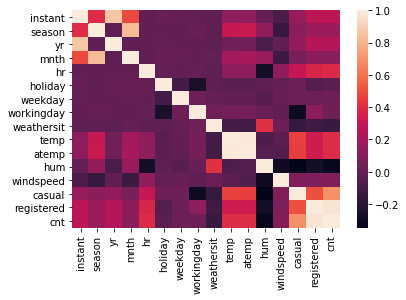

In [22]:
# checks correlation with all columns
corr=data.corr()
sb.heatmap(corr)

In [23]:
# checks correlation with all columns
print(corr['cnt'].sort_values(ascending=False)[:])

cnt           1.000000
registered    0.972151
casual        0.694564
temp          0.404772
atemp         0.400929
hr            0.394071
instant       0.278379
yr            0.250495
season        0.178056
mnth          0.120638
windspeed     0.093234
workingday    0.030284
weekday       0.026900
holiday      -0.030927
weathersit   -0.142426
hum          -0.322911
Name: cnt, dtype: float64


In [26]:
data = data[['registered','cnt']]

In [27]:
# splitting data into train & test dataset
train,test=train_test_split(data,test_size=0.2)

In [28]:
print("train",train.shape)
print("test",test.shape)

train (13903, 2)
test (3476, 2)


In [29]:
# saving datasets into csv filesS
test.to_csv('test_data.csv',index=False,encoding='utf-8')
train.to_csv('train_data.csv',index=False,encoding='utf-8')

In [31]:
# loading training data csv file
train_df = pd.read_csv('train_data.csv')
train_df.head()

,registered,cnt
0,55,69
1,205,218
2,92,95
3,334,413
4,62,71


In [32]:
# splitting training data into train and cross validation dataset 
train_data,cv_data=train_test_split(train_df,test_size=0.4)

In [33]:
# separating features and labels of training dataset
x_train=train_data.iloc[:,:-1].values
y_train=train_data.iloc[:,1].values

In [34]:
# saving cross validation data into csv file
cv_data.to_csv('cv_data.csv',index=False,encoding='utf-8')

In [35]:
regressor=DecisionTreeRegressor()
regressor.fit(x_train,y_train)

DecisionTreeRegressor()

In [36]:
y_pred = regressor.predict(x_train)
df = pd.DataFrame({'Actual': y_train, 'Predicted': y_pred})  
df.head()

,Actual,Predicted
0,827,793.000000
1,117,140.037037
2,337,295.333333
3,26,26.111111
4,277,267.352941


In [37]:
# loading cross validation dataset file
cv_data = pd.read_csv('cv_data.csv')
cv_data.head()

,registered,cnt
0,27,33
1,8,14
2,391,645
3,76,86
4,187,264


In [38]:
# separate labels and features of cross validation dataset
x_cv=cv_data.iloc[:,:-1].values
y_cv=cv_data.iloc[:,1].values

Accuracy of train data = 96.02778330285257
Accuracy of test data = 94.8644317724402


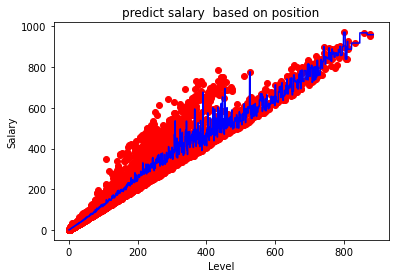

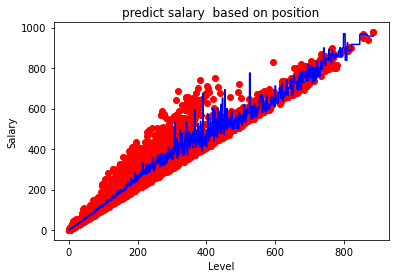

In [39]:
class DecisionTree:
    
    def get_predictions_train(self,x):        
        # getting prediction values
        y_pred = regressor.predict(x)
        return y_pred
    
    def get_accuracy(self,y_train,y_pred):
        Accuracy = sklearn.metrics.r2_score(y_train,y_pred)*100
        return Accuracy
        
    def visualize(self,y_pred,x,y):
        # visualizing the training set result
        x_grid=np.arange(min(x_cv),max(x_cv),0.1)
        x_grid=x_grid.reshape((len(x_grid),1))
        plt.scatter(x,y,color='red')
        plt.plot(x_grid,regressor.predict(x_grid),color='blue')
        plt.title('predict salary  based on position')
        plt.xlabel('Level')
        plt.ylabel('Salary')
        plt.show()
        
        
def main():
    # creates class object 
    obj = DecisionTree()
    y_pred_train = obj.get_predictions_train(x_train)
    y_pred_test = obj.get_predictions_train(x_cv)
    
    acc_train = obj.get_accuracy(y_train,y_pred_train)
    print("Accuracy of train data =",acc_train)
    
    acc_test = obj.get_accuracy(y_cv,y_pred_test)
    print("Accuracy of test data =",acc_test)
    
    if acc_train >= 85 and acc_test >=  60:
        fileObject = open("train_data.pkl",'wb')
        pickle.dump(regressor,fileObject)   
        # here we close the fileObject
        fileObject.close()

    
    obj.visualize(y_pred_train,x_train,y_train)
    obj.visualize(y_pred_test,x_cv,y_cv)
    
    
    
if __name__ == '__main__':
    main()